Epoch 1/100
34/34 [==============================] - 2s 32ms/step - loss: 1.0649 - val_loss: 1.0577
Epoch 2/100
34/34 [==============================] - 0s 10ms/step - loss: 1.0198 - val_loss: 1.0139
Epoch 3/100
34/34 [==============================] - 0s 9ms/step - loss: 0.9769 - val_loss: 0.9718
Epoch 4/100
34/34 [==============================] - 0s 9ms/step - loss: 0.9360 - val_loss: 0.9316
Epoch 5/100
34/34 [==============================] - 0s 9ms/step - loss: 0.8969 - val_loss: 0.8931
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 0.8593 - val_loss: 0.8562
Epoch 7/100
34/34 [==============================] - 0s 7ms/step - loss: 0.8232 - val_loss: 0.8209
Epoch 8/100
34/34 [==============================] - 0s 7ms/step - loss: 0.7887 - val_loss: 0.7866
Epoch 9/100
34/34 [==============================] - 0s 7ms/step - loss: 0.7554 - val_loss: 0.7541
Epoch 10/100
34/34 [==============================] - 0s 7ms/step - loss: 0.7236 - val_loss: 0.7224
Epoch 1

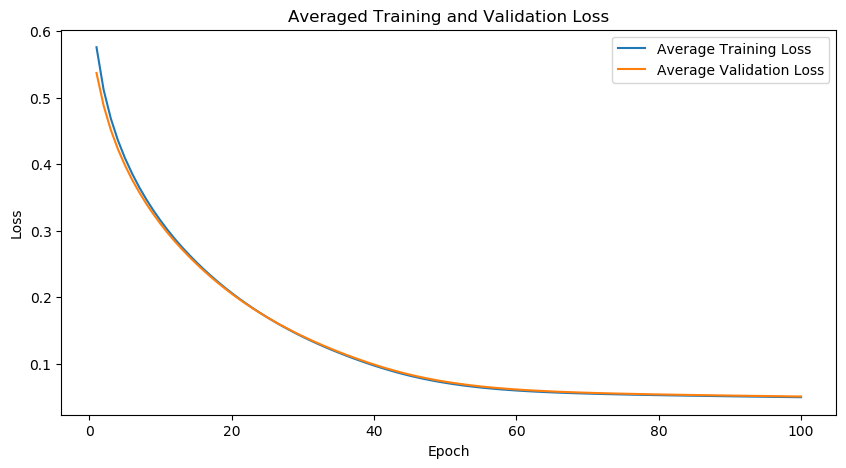

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Step 1: Load and Prepare the Dataset
# Assuming your CSV file is named 'pig.csv'
data = pd.read_csv('pig.csv')

# Assuming that your target variable column is named 'quality'
X = data.drop(columns=['quality'])
y = data['quality']

# Initialize K-fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)  # Set the number of splits to 3

# Initialize lists to store mean squared errors and loss history from each fold
mse_scores = []
all_loss_history = []

# Step 2: Create the Neural Network Model (same as before)

# Define the learning rate (e.g., 0.00001) and create an optimizer with it
learning_rate = 0.00001
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate)  # Use legacy optimizer

# Define early stopping with patience
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 3: Train the Model with Cross-Validation
for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model = keras.Sequential([
        keras.layers.Input(shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1)  # Output layer with 1 neuron for regression
    ])

    model.compile(optimizer=optimizer, loss='mean_squared_error')

    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1, callbacks=[early_stopping])

    # Collect loss history for this fold
    loss_history = history.history['loss']
    val_loss_history = history.history['val_loss']
    all_loss_history.append((loss_history, val_loss_history))

    # Evaluate the model on the validation set
    y_pred = model.predict(X_val)
    fold_mse = mean_squared_error(y_val, y_pred)
    mse_scores.append(fold_mse)

# Step 4: Evaluate the Model with Cross-Validation Results
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print(f'Mean Squared Error (MSE) across {kf.n_splits} folds: {mean_mse:.2f} ± {std_mse:.2f}')

# Calculate the average loss history over the folds
avg_train_loss = np.mean([loss_history for loss_history, _ in all_loss_history], axis=0)
avg_val_loss = np.mean([val_loss_history for _, val_loss_history in all_loss_history], axis=0)

# Plot the averaged loss function
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(avg_train_loss) + 1), avg_train_loss, label='Average Training Loss')
plt.plot(range(1, len(avg_val_loss) + 1), avg_val_loss, label='Average Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Averaged Training and Validation Loss')
plt.show()

In [2]:
from keras.models import load_model

model.save('model.h5')  # Save the model to a file named 'model.h5'